# Question 5

## Cartoon Creation

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

### <b>Part 1</b>

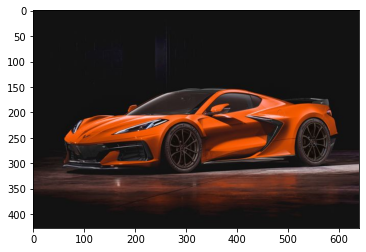

In [10]:
r = cv2.imread("images/RollsRoyce.jpg")
r = cv2.cvtColor(r,cv2.COLOR_BGR2RGB)
plt.imshow(r)

In [11]:
def padding(pic,k):
    #Padding
    #Number of row/columns needed for padding is floor(k/2)
    padNum = math.floor(k/2)
#     print(padNum)
    # 2k extra rows and columns are needed to accomodate both sides
    if len(pic.shape)==3:
        padPic = np.zeros((pic.shape[0]+(2*padNum),pic.shape[1]+(2*padNum),3))
    else:
        padPic = np.zeros((pic.shape[0]+(2*padNum),pic.shape[1]+(2*padNum)))
#     print(padPic.shape)
    if len(pic.shape)==3:                            
        padPic[padNum:padPic.shape[0]-padNum, padNum:padPic.shape[1]-padNum,:] = pic
    else:                     
        padPic[padNum:padPic.shape[0]-padNum, padNum:padPic.shape[1]-padNum] = pic
    # Image will start from (padNum,padNum)
    xStart = padNum
    xEnd = padPic.shape[0]-padNum
    yStart = padNum
    yEnd = padPic.shape[1]-padNum
#     print(pic.shape)
    padPic[xStart:xEnd, yStart:yEnd] = pic
#     plt.imshow(padPic,cmap='gray')
    return padPic.astype('int')

In [12]:
def gausFilter(img,s,q):
    k = math.floor(q/2)
    imgP = padding(img,k)
    out = np.zeros_like(imgP)
    sS = 2 * (s ** 2)
    kern = np.zeros([q,q])
    center = int(q/2)
    for i in range(q):
        for j in range(q):
            kern[i][j] = -1*((i-center)**2 + (j-center)**2)/s
    #For 3D
    if len(out.shape)==3:
        kern = np.dstack((kern,kern,kern))
    for i in range(k,imgP.shape[0]-k):
        for j in range(k,imgP.shape[1]-k):
            kernCom = kern
            kernCom = np.exp(kernCom)
            out[i][j] = np.rint(np.sum(imgP[i-center:i+center+1,j-center:j+center+1]*kernCom,axis=(0,1))/np.sum(kernCom,axis=(0,1)))
    if len(out.shape)==3:                            
        out = out[center:out.shape[0]-center,center:out.shape[1]-center,:]
    else:                     
        out = out[center:out.shape[0]-center,center:out.shape[1]-center]
    return out.astype('uint8')

In [13]:
def bilFilter(img,sS,sR,q):
    k = math.floor(q/2)
    imgP = padding(img,k)
    out = np.zeros_like(imgP)
    sS = 2 * (sS ** 2)
    sR = 2 * (sR ** 2)
    kern = np.zeros([q,q])
    center = int(q/2)
    for i in range(q):
        for j in range(q):
            kern[i][j] = -1*((i-center)**2 + (j-center)**2)/sS
    #For 3D
    if len(out.shape)==3:
        kern = np.dstack((kern,kern,kern))
    for i in range(k,imgP.shape[0]-k):
        for j in range(k,imgP.shape[1]-k):
            kern1 = -1*(imgP[i-center:i+center+1,j-center:j+center+1]-imgP[i][j])**2/sR
            kernCom = kern + kern1
            kernCom = np.exp(kernCom)
            out[i][j] = np.rint(np.sum(imgP[i-center:i+center+1,j-center:j+center+1]*kernCom,axis=(0,1))/np.sum(kernCom,axis=(0,1)))
    if len(out.shape)==3:                            
        out = out[center:out.shape[0]-center,center:out.shape[1]-center,:]
    else:                     
        out = out[center:out.shape[0]-center,center:out.shape[1]-center]
    return out.astype('uint8')

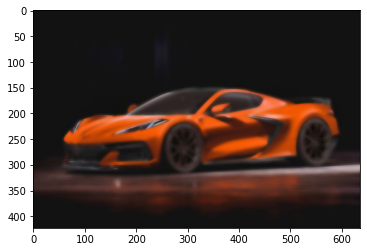

In [15]:
billu = bilFilter(r,40,100,9)
plt.imshow(billu)

### <b>Part 2</b>

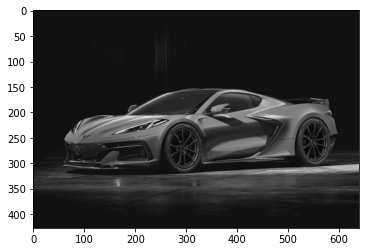

In [14]:
rcopy = np.copy(r)
#Step-1 Convert to grayscale
rG = cv2.cvtColor(rcopy,cv2.COLOR_RGB2GRAY)
plt.imshow(rG,cmap='gray')

### <b>Part 3</b>

In [16]:
#Step-2 Blurring
output1 = gausFilter(rG, 10,5)
output2 = gausFilter(output1, 10, 5)
output3 = gausFilter(output2, 10, 5)
output4 = gausFilter(output3, 10, 5)
output5 = gausFilter(output4, 10, 5)

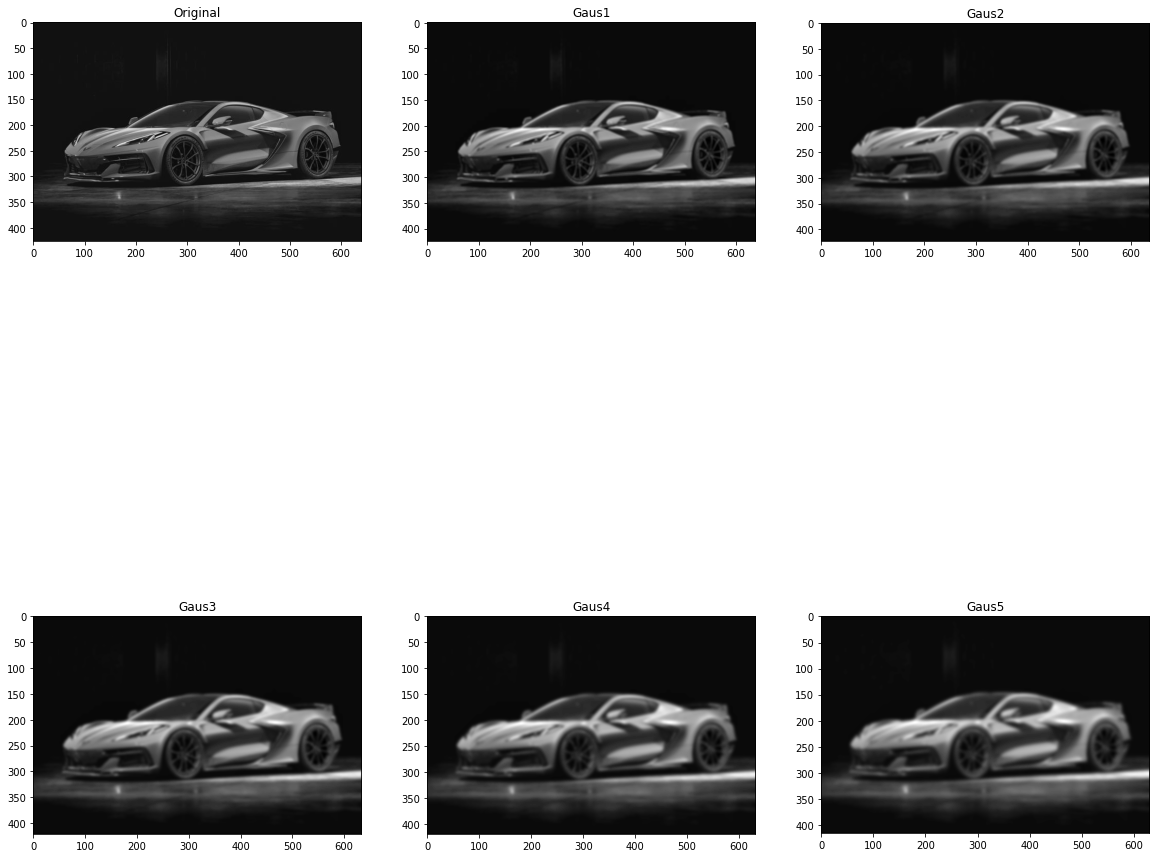

In [17]:
# Plotting
f, axarr = plt.subplots(2, 3, figsize=(20,20))
axarr[0][0].imshow(rG,cmap='gray')
axarr[0][0].title.set_text('Original',)
axarr[0][1].imshow(output1,cmap='gray')
axarr[0][1].title.set_text('Gaus1')
axarr[0][2].imshow(output2,cmap='gray')
axarr[0][2].title.set_text('Gaus2')
axarr[1][0].imshow(output3,cmap='gray')
axarr[1][0].title.set_text('Gaus3')
axarr[1][1].imshow(output4,cmap='gray')
axarr[1][1].title.set_text('Gaus4')
axarr[1][2].imshow(output5,cmap='gray')
axarr[1][2].title.set_text('Gaus5')

In [18]:
def adaptiveThres(src, maxVal, bSize, C):
    cur = src.astype('float64')
    out = np.zeros(cur.shape)
    out1 = np.zeros(src.shape,dtype=np.uint32)
    th = 5
    #prefix-sum
    for i in range(out.shape[0]):
        for j in range(out.shape[1]):
            out1[i][j] = np.sum(cur[0:i,0:j])
    print("FS")
    for i in range(src.shape[0]):
        for j in range(src.shape[1]): 
            X = [max(i - bSize, 0),max(j - bSize, 0)]
            Y = [min(i + bSize, cur.shape[0] - 1), min(j + bSize, cur.shape[1] - 1)]
            
            S = out1[X[0], X[1]] + out1[Y[0], Y[1]]
            S-= out1[X[0], Y[1]] + out1[Y[0], X[1]]
            S-= C
            cond = (100-th)*S/100
            dif1 = Y[0] - X[0]
            dif2 = Y[1] - X[1]
            cond1 = dif1*dif2*cur[i,j]
            out[i,j] = (cond1 >= cond)
            #Normalise
            out[i,j] = out[i,j]*maxVal
    return out.astype('uint8')

### <b>Part 4</b>

In [19]:
mask1 = adaptiveThres(output4,255,9,5)
mask2 = adaptiveThres(output4,255,15,5)
mask3 = adaptiveThres(output4,255,3,5)
mask4 = adaptiveThres(output4,255,21,5)
mask5 = adaptiveThres(output4,255,3,9)
mask6 = adaptiveThres(output4,255,9,9)

FS
FS
FS
FS
FS
FS


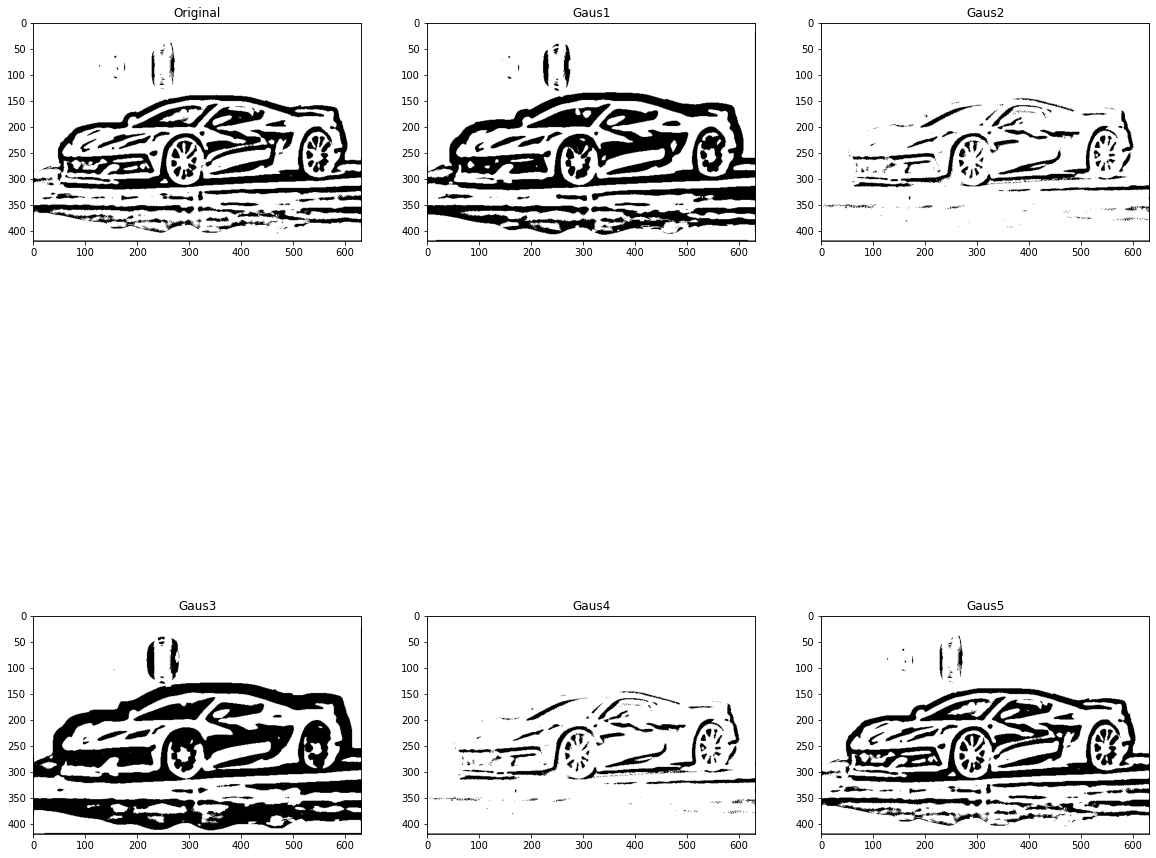

In [20]:
# Plotting
f, axarr = plt.subplots(2, 3, figsize=(20,20))
axarr[0][0].imshow(mask1,cmap='gray')
axarr[0][0].title.set_text('Original',)
axarr[0][1].imshow(mask2,cmap='gray')
axarr[0][1].title.set_text('Gaus1')
axarr[0][2].imshow(mask3,cmap='gray')
axarr[0][2].title.set_text('Gaus2')
axarr[1][0].imshow(mask4,cmap='gray')
axarr[1][0].title.set_text('Gaus3')
axarr[1][1].imshow(mask5,cmap='gray')
axarr[1][1].title.set_text('Gaus4')
axarr[1][2].imshow(mask6,cmap='gray')
axarr[1][2].title.set_text('Gaus5')

### <b>Part 5</b>

In [22]:
result1 = billu[0:419,0:632] & np.dstack((mask1, mask1, mask1))
result2 = billu[0:419,0:632] & np.dstack((mask2, mask2, mask2))
result3 = billu[0:419,0:632] & np.dstack((mask3, mask3, mask3))
result4 = billu[0:419,0:632] & np.dstack((mask4, mask4, mask4))
result5 = billu[0:419,0:632] & np.dstack((mask5, mask5, mask5))
result6 = billu[0:419,0:632] & np.dstack((mask6, mask6, mask6))

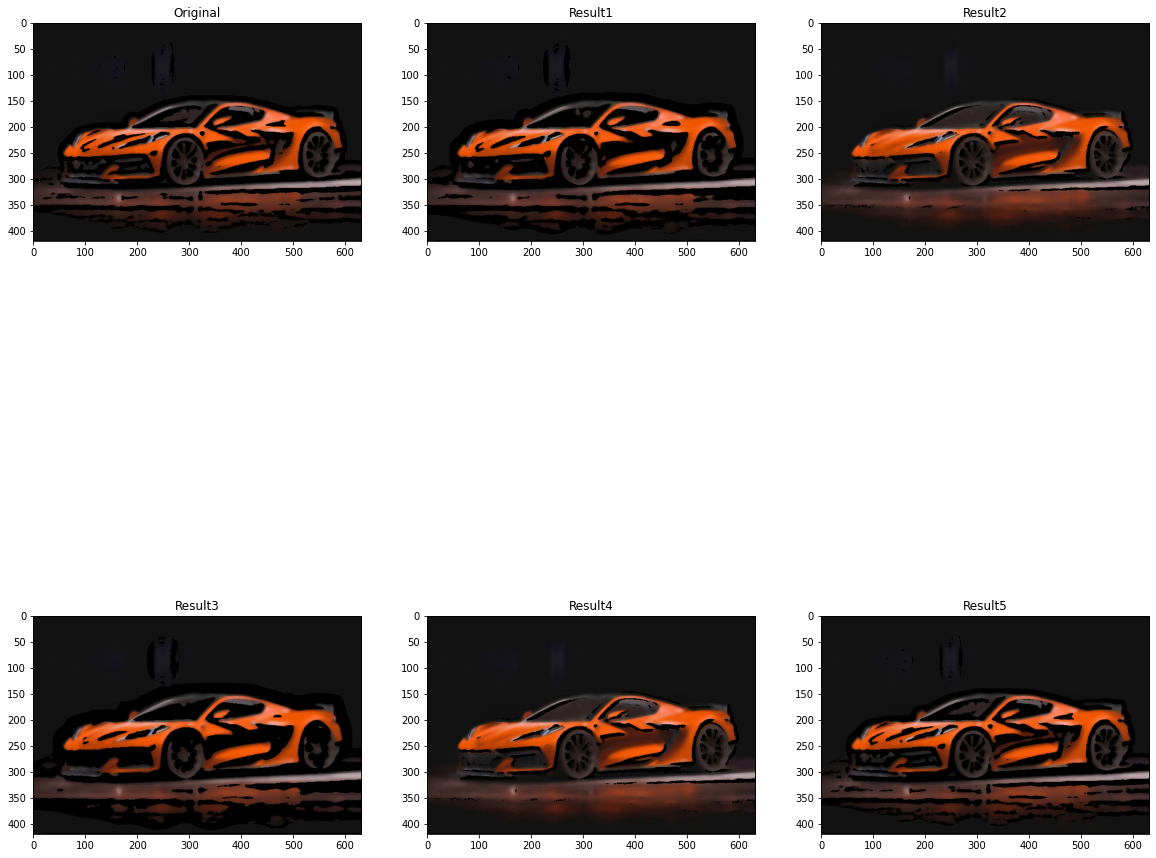

In [24]:
f, axarr = plt.subplots(2, 3, figsize=(20,20))
axarr[0][0].imshow(result1,cmap='gray')
axarr[0][0].title.set_text('Original',)
axarr[0][1].imshow(result2,cmap='gray')
axarr[0][1].title.set_text('Result1')
axarr[0][2].imshow(result3,cmap='gray')
axarr[0][2].title.set_text('Result2')
axarr[1][0].imshow(result4,cmap='gray')
axarr[1][0].title.set_text('Result3')
axarr[1][1].imshow(result5,cmap='gray')
axarr[1][1].title.set_text('Result4')
axarr[1][2].imshow(result6,cmap='gray')
axarr[1][2].title.set_text('Result5')